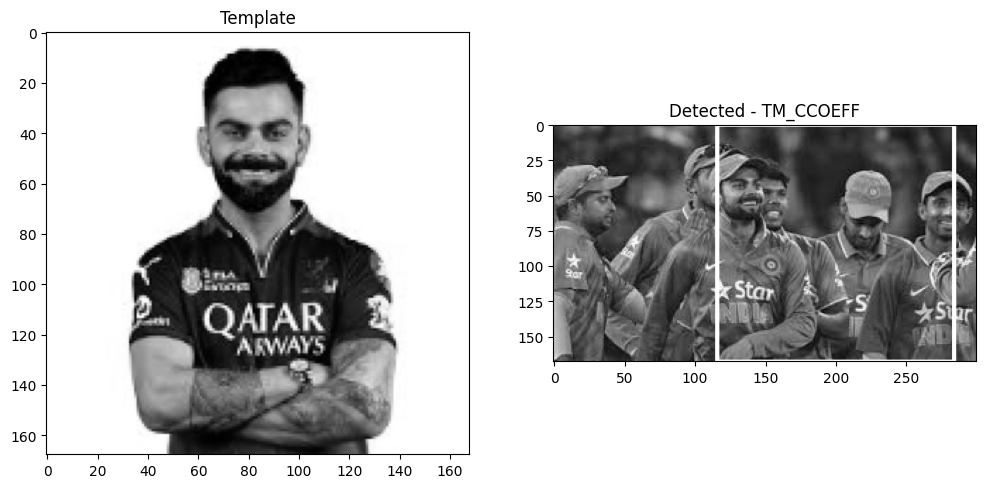

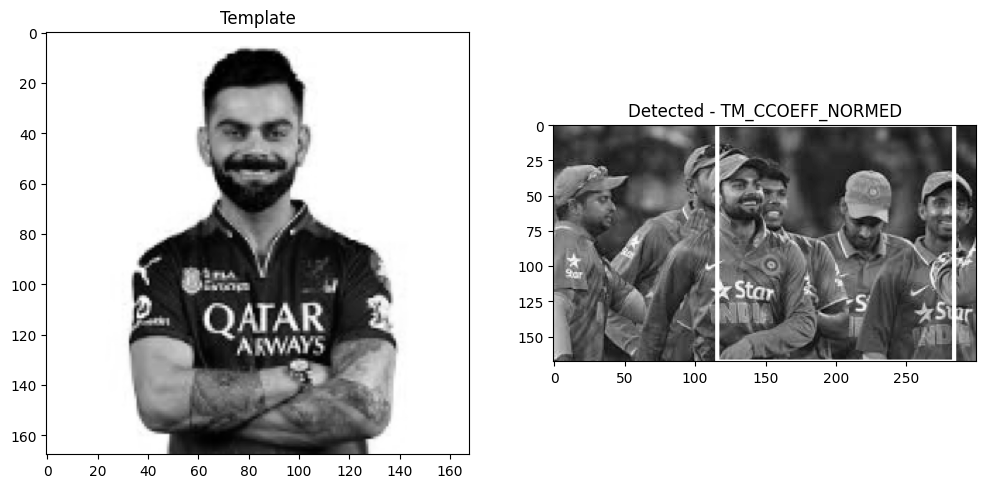

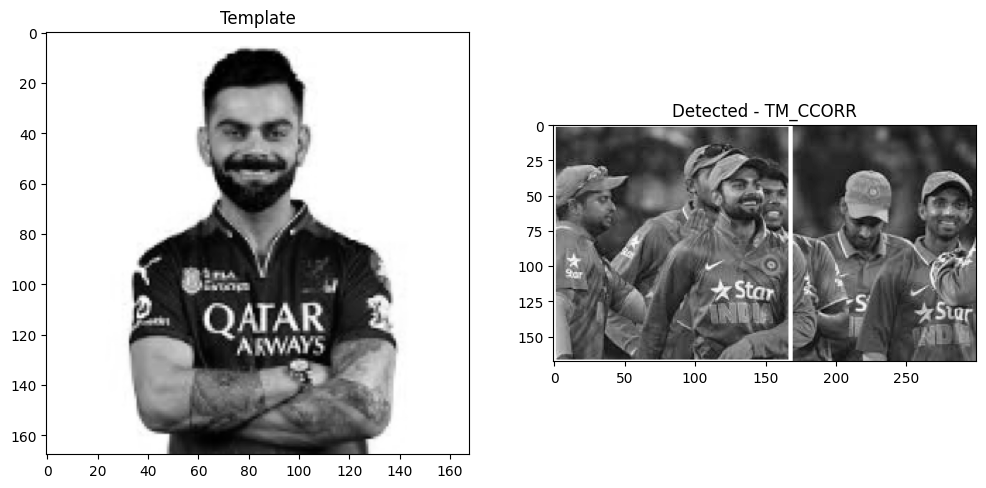

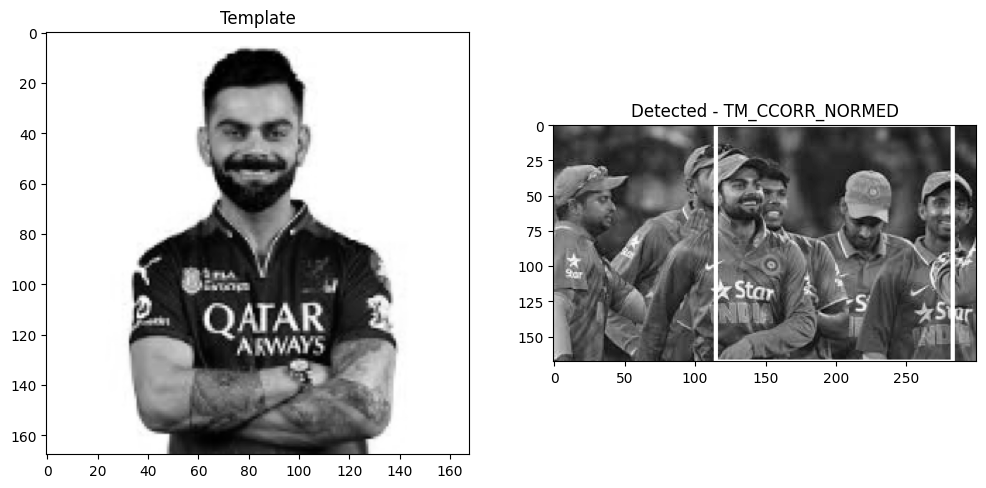

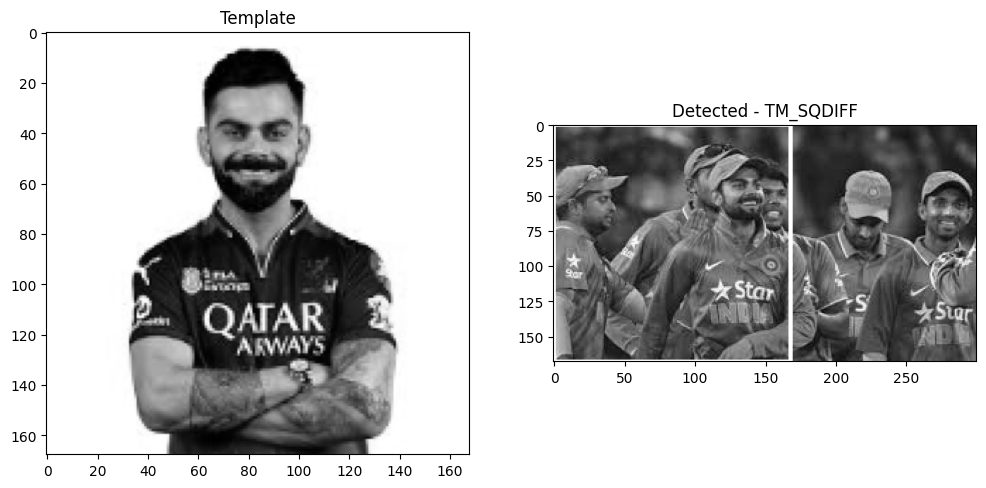

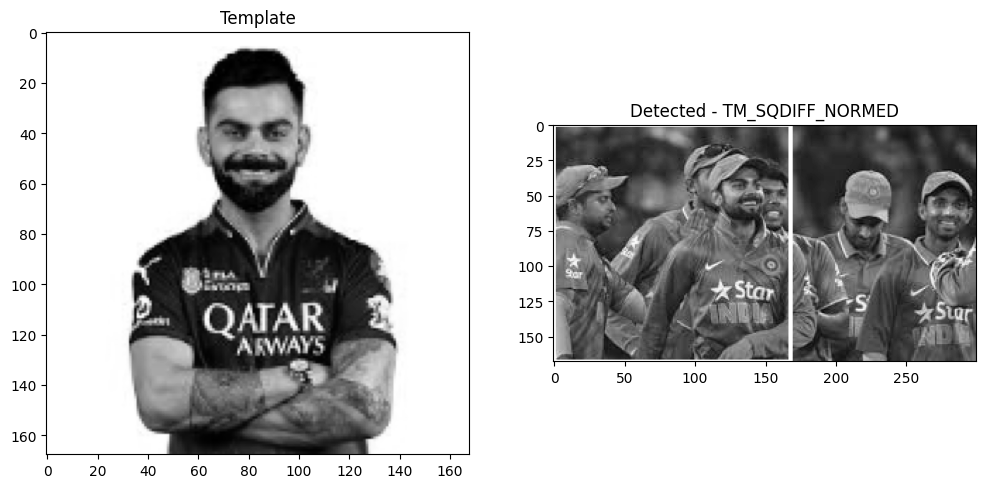

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread(r"C:\Users\vasan\Downloads\images (2).jpeg")
template = cv2.imread(r"C:\Users\vasan\Downloads\download (1).jpeg")

# Convert to grayscale if needed
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.shape[2]==3 else img.copy()
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) if template.shape[2]==3 else template.copy()

# Resize template if it's bigger than the image
if template_gray.shape[0] > img_gray.shape[0] or template_gray.shape[1] > img_gray.shape[1]:
    scale_y = img_gray.shape[0] / template_gray.shape[0]
    scale_x = img_gray.shape[1] / template_gray.shape[1]
    scale = min(scale_x, scale_y, 1)  # Keep scale <= 1
    new_size = (int(template_gray.shape[1]*scale), int(template_gray.shape[0]*scale))
    template_gray = cv2.resize(template_gray, new_size)

th, tw = template_gray.shape

methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for method_name in methods:
    # Template matching
    method = getattr(cv2, method_name)
    result = cv2.matchTemplate(img_gray, template_gray, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = min_loc if method_name in ['TM_SQDIFF', 'TM_SQDIFF_NORMED'] else max_loc
    bottom_right = (top_left[0]+tw, top_left[1]+th)
    
    # Draw rectangle on a copy of the original image
    img_copy = img_gray.copy()
    cv2.rectangle(img_copy, top_left, bottom_right, 255, 2)  # 255 for white rectangle
    
    # Plot template and detected image side by side
    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.imshow(template_gray, cmap='gray')
    plt.title('Template')
    
    plt.subplot(1,2,2)
    plt.imshow(img_copy, cmap='gray')
    plt.title(f'Detected - {method_name}')
    
    plt.show()


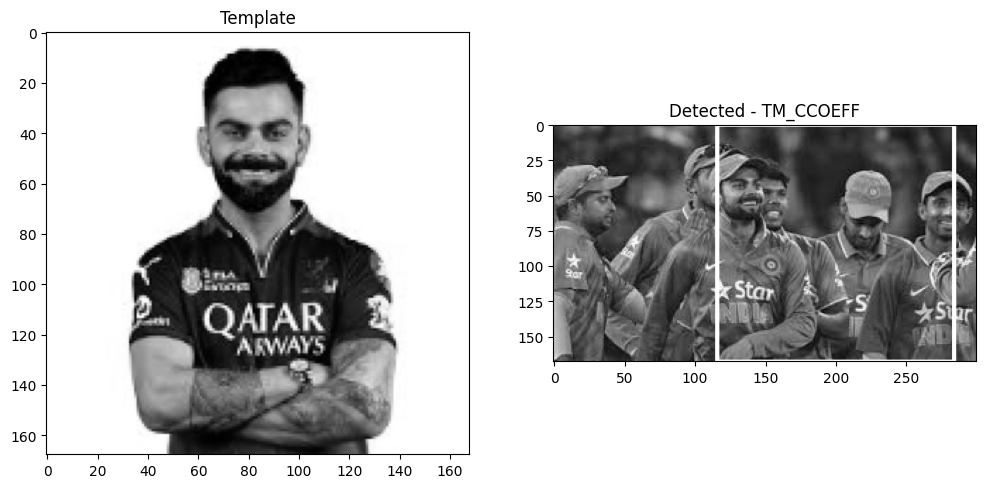

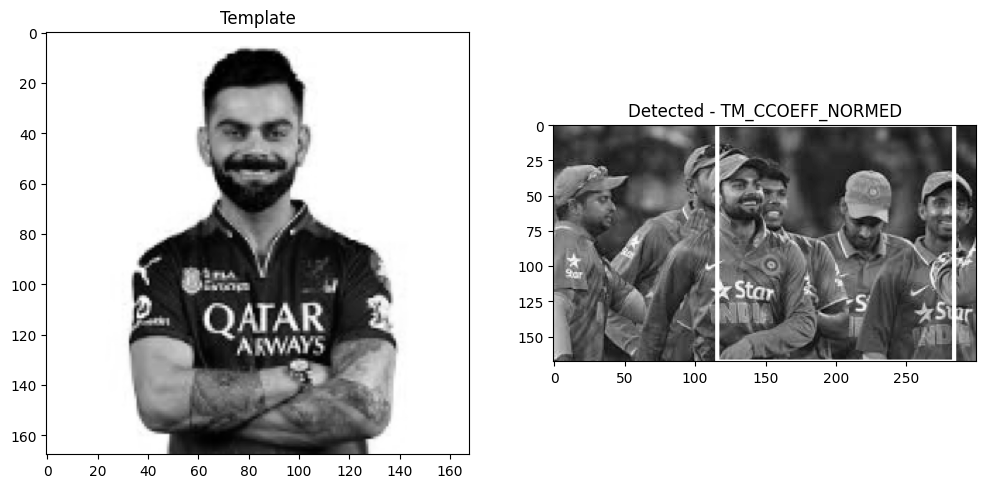

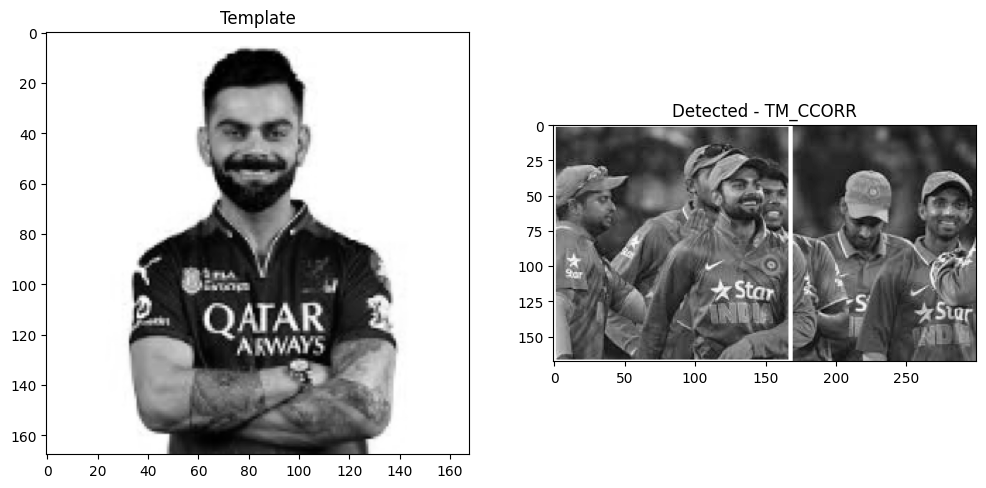

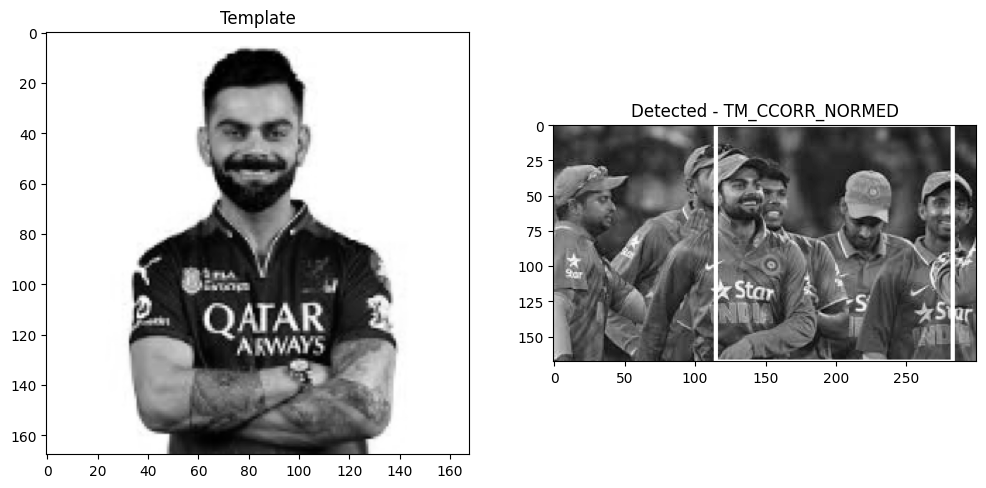

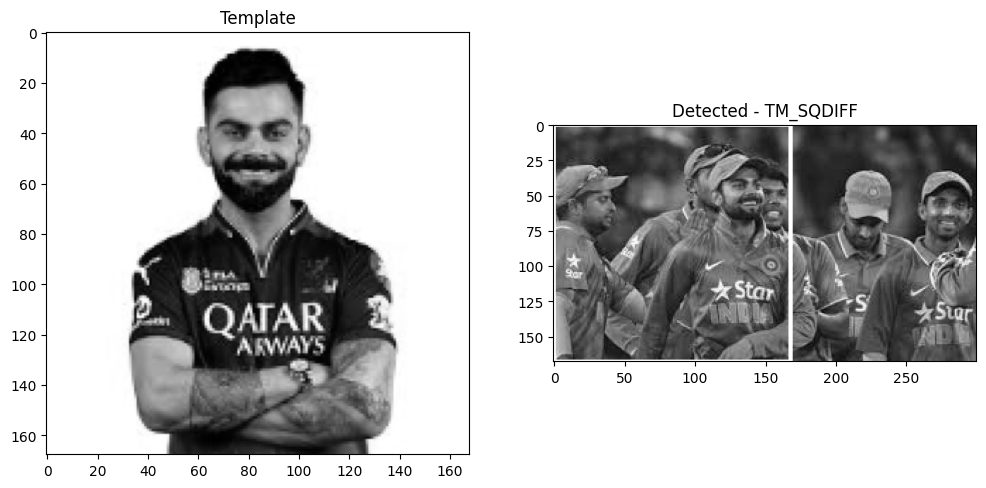

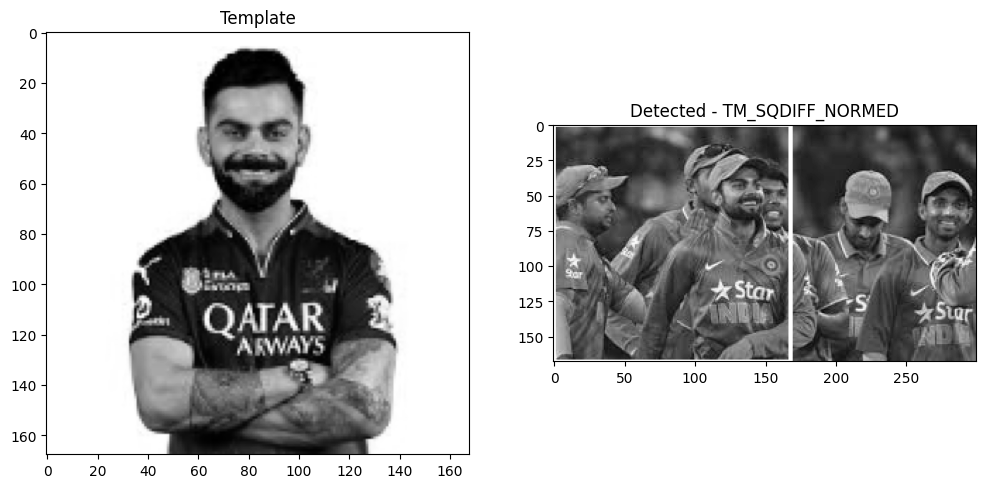

In [7]:
import cv2
import matplotlib.pyplot as plt

def load_and_gray(path):
    """Load an image and convert to grayscale if needed."""
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.shape[2] == 3 else img

def resize_template(template, img):
    """Resize template if it's larger than the image."""
    th, tw = template.shape
    ih, iw = img.shape
    if th > ih or tw > iw:
        scale = min(iw/tw, ih/th, 1)
        new_size = (int(tw*scale), int(th*scale))
        template = cv2.resize(template, new_size)
    return template

def match_and_plot(img, template, methods):
    th, tw = template.shape
    for method_name in methods:
        method = getattr(cv2, method_name)
        result = cv2.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        top_left = min_loc if method_name in ['TM_SQDIFF', 'TM_SQDIFF_NORMED'] else max_loc
        bottom_right = (top_left[0]+tw, top_left[1]+th)

        img_copy = img.copy()
        cv2.rectangle(img_copy, top_left, bottom_right, 255, 2)

        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.imshow(template, cmap='gray')
        plt.title('Template')
        plt.subplot(1,2,2)
        plt.imshow(img_copy, cmap='gray')
        plt.title(f'Detected - {method_name}')
        plt.show()

# --- Main ---
img_gray = load_and_gray(r"C:\Users\vasan\Downloads\images (2).jpeg")
template_gray = load_and_gray(r"C:\Users\vasan\Downloads\download (1).jpeg")
template_gray = resize_template(template_gray, img_gray)

methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
match_and_plot(img_gray, template_gray, methods)
